## importing libraries

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import r2_score   
from math import sqrt

## preparing data

In [2]:
a = -1
b = 2
x = np.linspace(0,20)
y = a * x + b

In [3]:
print("x=",x)
print("y=",y)

x= [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
y= [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -

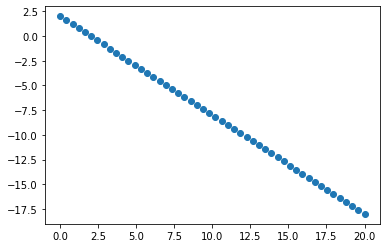

In [4]:
plt.scatter(x,y)

## Adagrad implementation

In [5]:
def Adagrad (x, y, alpha, v0, v1, epoch):
    theta_0 = 0
    theta_1 = 0
    epsilon = 1e-8

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    v0_list = []
    v1_list = []
    hypothesis = np.zeros(len(x))
    
    for i in range (epoch):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        v0 = v0 + (gradiant_theta0 ** 2)
        v0_list.append(v0)
        theta_0 = theta_0 - ((alpha / (epsilon + sqrt(v0))) * gradiant_theta0)
        theta0_values.append(theta_0)
        
        v1 = v1 + (gradiant_theta1 ** 2)
        v1_list.append(v1)
        theta_1 = theta_1 - ((alpha / (epsilon + sqrt(v1))) * gradiant_theta1)
        theta1_values.append(theta_1)
                             
        if (i > 0) & (abs(cost_function[i-1] - cost_function[i]) < 0.01):
          print("Stoped after {} iteration\n".format(i+1))
          break
        elif(i == epoch-1):
          print("Stoped after {} iteration\n".format(i+1))
    
        
    print("last theta0: ", theta0_values[-1], "\nlast theta1: ", theta1_values[-1], "\nlast losses: ", cost_function[-1], "\nlast hypothesis: ", new_hypothesis[-1])
    
    return theta0_values, theta1_values, cost_function, new_hypothesis

In [6]:
alpha = 0.01
v0 = 0
v1 = 0
epoch = 100000

theta0_adagrad, theta1_adagrad, losses_adagrad, hypo_adagrad = Adagrad (x, y, alpha, v0, v1, epoch)

Stoped after 67975 iteration

last theta0:  0.9225353992823445 
last theta1:  -0.9180803694697466 
last losses:  374.41885373595795 
last hypothesis:  [  0.92252101   0.54779478   0.17306854  -0.20165769  -0.57638392
  -0.95111016  -1.32583639  -1.70056263  -2.07528886  -2.45001509
  -2.82474133  -3.19946756  -3.5741938   -3.94892003  -4.32364627
  -4.6983725   -5.07309873  -5.44782497  -5.8225512   -6.19727744
  -6.57200367  -6.9467299   -7.32145614  -7.69618237  -8.07090861
  -8.44563484  -8.82036108  -9.19508731  -9.56981354  -9.94453978
 -10.31926601 -10.69399225 -11.06871848 -11.44344471 -11.81817095
 -12.19289718 -12.56762342 -12.94234965 -13.31707589 -13.69180212
 -14.06652835 -14.44125459 -14.81598082 -15.19070706 -15.56543329
 -15.94015952 -16.31488576 -16.68961199 -17.06433823 -17.43906446]


In [7]:
r2_score(y,hypo_adagrad[-1])

0.9913663417256179

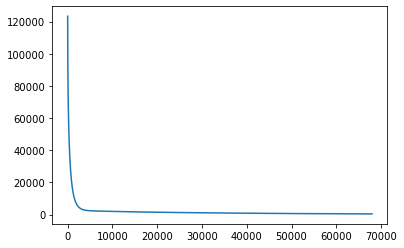

In [8]:
plt.plot(losses_adagrad)

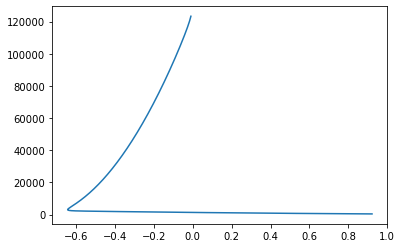

In [9]:
plt.plot(theta0_adagrad, losses_adagrad)

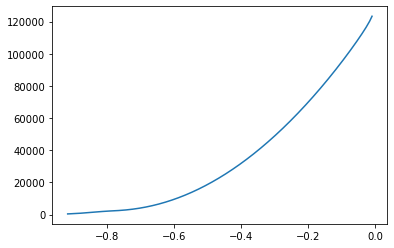

In [10]:
plt.plot(theta1_adagrad, losses_adagrad)

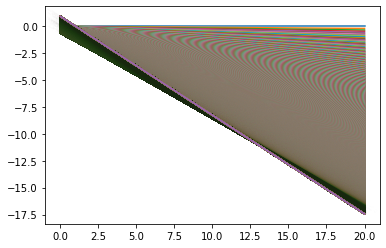

In [11]:
for  i in range(len(hypo_adagrad)):
    plt.plot(x,hypo_adagrad[i])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

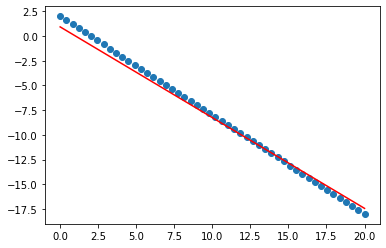

In [12]:
plt.plot(x,hypo_adagrad[-1],'r')
plt.scatter(x,y)
plt.show

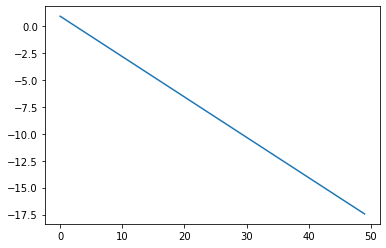

In [13]:
best_hypo = hypo_adagrad[-1]
plt.plot(best_hypo)

## RMS Prop implementation

In [14]:
def RMSprop (x, y, alpha, beta, v0, v1, epoch):
    theta_0 = 0
    theta_1 = 0
    epsilon = 1e-8

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    v0_list = []
    v1_list = []
    hypothesis = np.zeros(len(x))
    
    for i in range (epoch):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        v0 = beta * v0 + (1 - beta) * (gradiant_theta0 ** 2)
        v0_list.append(v0)
        
        theta_0 = theta_0 - ((alpha / (epsilon + sqrt(v0))) * gradiant_theta0)
        theta0_values.append(theta_0)
        
        v1 = beta * v1 + (1 - beta) * (gradiant_theta1 ** 2)
        v1_list.append(v1)
        
        theta_1 = theta_1 - ((alpha / (epsilon + sqrt(v1))) * gradiant_theta1)
        theta1_values.append(theta_1)
                             
        if (i > 0) & (abs(cost_function[i-1] - cost_function[i]) < 0.01):
          print("Stoped after {} iteration\n".format(i+1))
          break
        elif(i == epoch-1):
          print("Stoped after {} iteration\n".format(i+1))
    
        
    print("last theta0: ", theta0_values[-1], "\nlast theta1: ", theta1_values[-1], "\nlast losses: ", cost_function[-1], "\nlast hypothesis: ", new_hypothesis[-1])
    
    return theta0_values, theta1_values, cost_function, new_hypothesis

In [15]:
alpha = 0.01
beta = 0.9
v0 = 0
v1 = 0
epoch = 100000

theta0_rms, theta1_rms, losses_rms, hypo_rms = RMSprop (x, y, alpha, beta, v0, v1, epoch)

Stoped after 428 iteration

last theta0:  1.9871987380743903 
last theta1:  -0.9936482639523504 
last losses:  4.973267965086359 
last hypothesis:  [  1.97654678   1.56691575   1.15728471   0.74765368   0.33802264
  -0.07160839  -0.48123942  -0.89087046  -1.30050149  -1.71013253
  -2.11976356  -2.5293946   -2.93902563  -3.34865667  -3.7582877
  -4.16791874  -4.57754977  -4.98718081  -5.39681184  -5.80644287
  -6.21607391  -6.62570494  -7.03533598  -7.44496701  -7.85459805
  -8.26422908  -8.67386012  -9.08349115  -9.49312219  -9.90275322
 -10.31238426 -10.72201529 -11.13164632 -11.54127736 -11.95090839
 -12.36053943 -12.77017046 -13.1798015  -13.58943253 -13.99906357
 -14.4086946  -14.81832564 -15.22795667 -15.6375877  -16.04721874
 -16.45684977 -16.86648081 -17.27611184 -17.68574288 -18.09537391]


In [16]:
r2_score(y,hypo_rms[-1])

0.9998853222916286

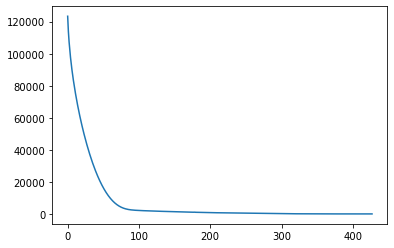

In [17]:
plt.plot(losses_rms)

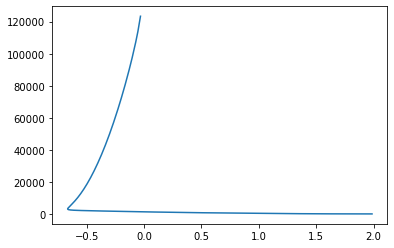

In [18]:
plt.plot(theta0_rms, losses_rms)

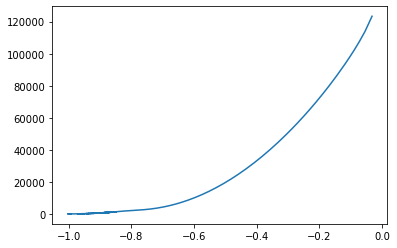

In [19]:
plt.plot(theta1_rms, losses_rms)

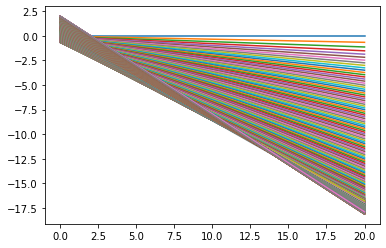

In [20]:
for  i in range(len(hypo_rms)):
    plt.plot(x,hypo_rms[i])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

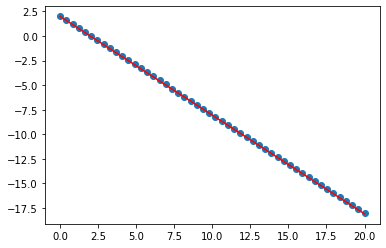

In [21]:
plt.plot(x,hypo_rms[-1],'r')
plt.scatter(x,y)
plt.show

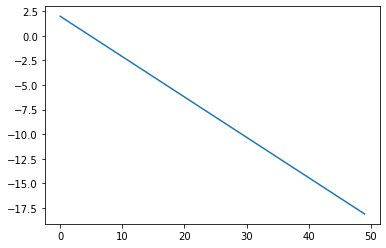

In [22]:
best_hypo = hypo_rms[-1]
plt.plot(best_hypo)

## Adam implementation

In [52]:
def Adam (x, y, alpha, beta1, beta2, m0, m1, v0, v1, epsilon, epoch):
    theta_0 = 0
    theta_1 = 0

    cost_function = []
    theta0_values = []
    theta1_values = []
    new_hypothesis = []
    hypothesis = np.zeros(len(x))
    
    for i in range (1, epoch):
        
        hypothesis = theta_0 + theta_1 * x
        new_hypothesis.append(hypothesis)
        
        cost = (1/2*len(x))* np.sum(((hypothesis - y) ** 2))
        cost_function.append(cost)
        
        gradiant_theta0 = (1/len(x)) * np.sum(hypothesis - y)
        gradiant_theta1 = (1/len(x)) * np.sum((hypothesis - y) * x)
        
        m0 = (beta1 * m0) + ((1 - beta1) * gradiant_theta0)
        m0_new = m0 / (1 - (beta1 ** i))
        
        v0 = (beta2 * v0) + ((1 - beta2) * (gradiant_theta0 ** 2))
        v0_new = v0 / (1 - (beta2 ** i))
        
        theta_0 = theta_0 - ((alpha / (epsilon + sqrt(v0_new))) * m0_new)
        theta0_values.append(theta_0)
        
        m1 = (beta1 * m1) + ((1 - beta1) * gradiant_theta1)
        m1_new = m1 / (1 - (beta1 ** i))
        
        v1 = (beta2 * v1) + ((1 - beta2) * (gradiant_theta1 ** 2))
        v1_new = v1 / (1 - (beta2 ** i))
        
        theta_1 = theta_1 - ((alpha / (epsilon + sqrt(v1_new))) * m1_new)
        theta1_values.append(theta_1)
                             
        if (cost < 0.05):
            final_epoch = i
            print("final epoch= ",final_epoch)
            break
    
        
    print("last theta0: ", theta0_values[-1], "\nlast theta1: ", theta1_values[-1], "\nlast losses: ", cost_function[-1], "\nlast hypothesis: ", new_hypothesis[-1])
    
    return theta0_values, theta1_values, cost_function, new_hypothesis

In [56]:
alpha = 0.05
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
v0 = 0
v1 = 0
m0 = 0
m1 = 0
epoch = 1000

theta0_adam, theta1_adam, losses_adam, hypo_adam = Adam (x, y, alpha, beta1, beta2, m0, m1, v0, v1, epsilon, epoch)

final epoch=  522
last theta0:  1.9879429491161027 
last theta1:  -0.999082735204722 
last losses:  0.04855817515594399 
last hypothesis:  [  1.98773008   1.57994782   1.17216555   0.76438329   0.35660103
  -0.05118123  -0.45896349  -0.86674575  -1.27452801  -1.68231028
  -2.09009254  -2.4978748   -2.90565706  -3.31343932  -3.72122158
  -4.12900384  -4.53678611  -4.94456837  -5.35235063  -5.76013289
  -6.16791515  -6.57569741  -6.98347967  -7.39126194  -7.7990442
  -8.20682646  -8.61460872  -9.02239098  -9.43017324  -9.8379555
 -10.24573777 -10.65352003 -11.06130229 -11.46908455 -11.87686681
 -12.28464907 -12.69243133 -13.1002136  -13.50799586 -13.91577812
 -14.32356038 -14.73134264 -15.1391249  -15.54690717 -15.95468943
 -16.36247169 -16.77025395 -17.17803621 -17.58581847 -17.99360073]


In [57]:
r2_score(y,hypo_adam[-1])

0.9999988803056081

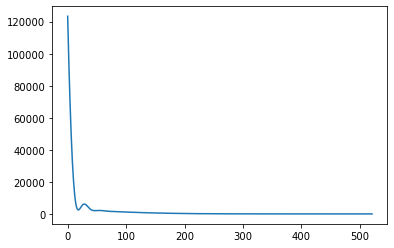

In [58]:
plt.plot(losses_adam)

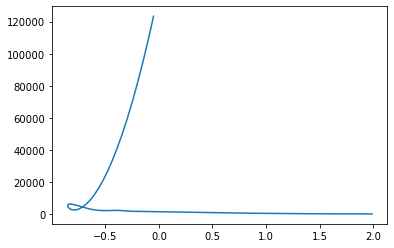

In [59]:
plt.plot(theta0_adam, losses_adam)

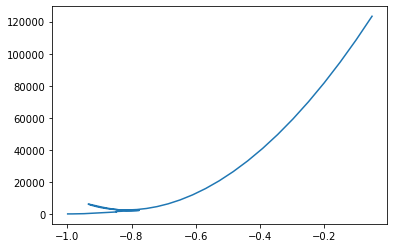

In [60]:
plt.plot(theta1_adam, losses_adam)

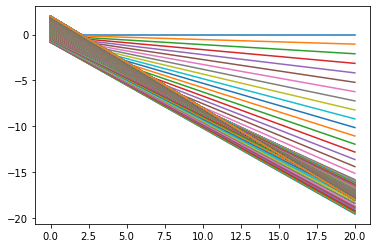

In [61]:
for  i in range(len(hypo_adam)):
    plt.plot(x,hypo_adam[i])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

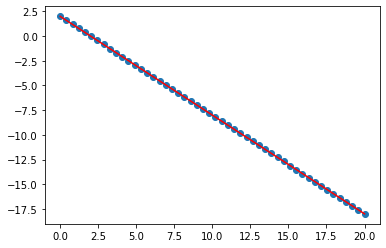

In [62]:
plt.plot(x,hypo_adam[-1],'r')
plt.scatter(x,y)
plt.show

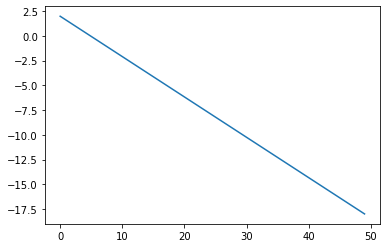

In [63]:
best_hypo = hypo_adam[-1]
plt.plot(best_hypo)

##  thank you :)